## Load data

In [335]:
import numpy as np

def load_data():

  data_set = []
  with open('./iris.data', 'r') as f:
    data = f.read().splitlines()
    data = data[:-1]
    data_index = [i for i in range(len(data))]
    np.random.shuffle(data_index)
    data = np.array(data)
    data = data[data_index]
    for i, d in enumerate(data):
      # print(d)
      d = d.split(",")
      d = np.array(d)
      d[:-1] = d[:-1].astype(float)
      data_set.append(d)
    data_set = np.array(data_set)
    return data_set

data = load_data()
print(data[:8])
train = data[:105]
test = data[105:]

[['5.2' '3.4' '1.4' '0.2' 'Iris-setosa']
 ['6.1' '2.8' '4.7' '1.2' 'Iris-versicolor']
 ['4.7' '3.2' '1.6' '0.2' 'Iris-setosa']
 ['7.2' '3.6' '6.1' '2.5' 'Iris-virginica']
 ['6.7' '3.1' '4.7' '1.5' 'Iris-versicolor']
 ['5.6' '2.9' '3.6' '1.3' 'Iris-versicolor']
 ['6.1' '2.6' '5.6' '1.4' 'Iris-virginica']
 ['6.7' '3.1' '4.4' '1.4' 'Iris-versicolor']]


## Define differnt distance

In [0]:
def euclidean_distance(x1, x2):
  x1 = x1.astype(float)
  x2 = x2.astype(float)
  return np.sqrt(np.sum((x1 - x2) ** 2))


def normalized_euclidean_distance(x1, x2):

  x1 = x1.astype(float)
  x2 = x2.astype(float)
  return 0.5 * (np.var(x1-x2) / (np.var(x1) + np.var(x2)))

  # x1 = x1 / np.sqrt(np.sum(x1 ** 2))
  # x2 = x2 / np.sqrt(np.sum(x2 ** 2))
  # return euclidean_distance(x1, x2)

  # X=np.vstack([x1,x2])
  # sk = np.var(X, axis=0, ddof=1)
  # d1 = np.sqrt(((x1 - x2) ** 2 /sk).sum())
  # return d1


def cos_sim(x1, x2):
  x1 = x1.astype(float)
  x2 = x2.astype(float)
  x1 = np.mat(x1)
  x2 = np.mat(x2)
  num = float(x1 * x2.T)
  denom = np.linalg.norm(x1) * np.linalg.norm(x2)
  cos = num / denom
  sim = 0.5 + 0.5 * cos
  return -sim




In [0]:
import operator
# distance: 0(euclidean_distance), 1(normalized_euclidean_distance), 2(cos_sim)
def KNN(train, test, k=1, dist_type=0):
  dist_list= []
  for index, x in enumerate(train):
    if dist_type == 0:
      dist = euclidean_distance(x[:-1], test[:-1])
      dist_list.append((x, dist))
    elif dist_type == 1:
      dist = normalized_euclidean_distance(x[:-1], test[:-1])
      dist_list.append((x, dist))
    elif dist_type == 2:
      dist = cos_sim(x[:-1], test[:-1])
      dist_list.append((x, dist))
  dist_list.sort(key=operator.itemgetter(1))

  neighbors = [dist_list[i][0] for i in range(k)]
  # print(neighbors)

  label_count = {}
  for index, neighbor in enumerate(neighbors):
    if neighbor[-1] in label_count:
      label_count[neighbor[-1]] += 1
    else:
      label_count[neighbor[-1]] = 1
  # print(label_count)

  return max(label_count.items(), key=lambda x:x[1])

def evaluate_accuracy(test, predictions):
  acc_count = 0
  for i in range(len(test)):
    if(test[i][-1] == predictions[i]):
      acc_count += 1
  return (float(acc_count) / float(len(test)))




## euclidean distance

[0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


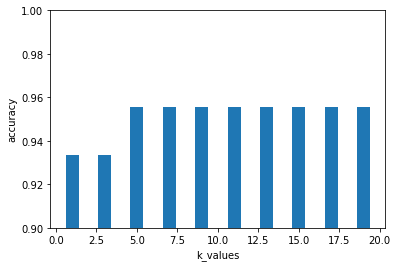

In [338]:
import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc_values = []

for k_value in k_values:
  predictions = []
  for t in test:
    pre_label, count = KNN(train, t, k=k_value, dist_type=0)
    predictions.append(pre_label)
  acc = evaluate_accuracy(test, predictions)
  acc_values.append(acc)

print(acc_values)

plt.bar(k_values, acc_values)
plt.ylabel('accuracy')
plt.xlabel('k_values')
plt.ylim(0.90, 1)
plt.show()

## normalized_euclidean_distance

[0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


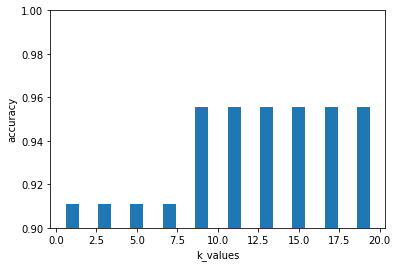

In [339]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc_values = []

for k_value in k_values:
  predictions = []
  for t in test:
    pre_label, count = KNN(train, t, k=k_value, dist_type=1)
    predictions.append(pre_label)
  acc = evaluate_accuracy(test, predictions)
  acc_values.append(acc)

print(acc_values)

plt.bar(k_values, acc_values)
plt.ylabel('accuracy')
plt.xlabel('k_values')
plt.ylim(0.90, 1)
plt.show()

## cos_sim

[0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


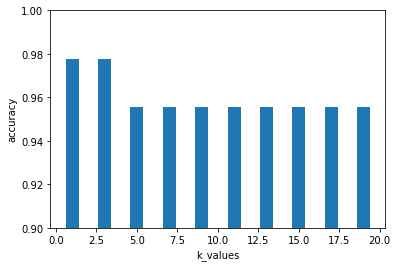

In [340]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
acc_values = []

for k_value in k_values:
  predictions = []
  for t in test:
    pre_label, count = KNN(train, t, k=k_value, dist_type=2)
    predictions.append(pre_label)
  acc = evaluate_accuracy(test, predictions)
  acc_values.append(acc)

print(acc_values)

plt.bar(k_values, acc_values)
plt.ylabel('accuracy')
plt.xlabel('k_values')
plt.ylim(0.90, 1)
plt.show()

# **Result**

### The accuracy rate will vary according to each random training set. For this training set, the best distance metric is cosine similarity and the best number of neighbor K is 1 and 3, which can get the highest accuracy 0.9777

## Use scikit-learn for comparison

In [341]:
from sklearn import neighbors
from sklearn import datasets
knn = neighbors.KNeighborsClassifier()
knn.fit(train[:,:-1], train[:,-1]) 
predict_label = knn.predict(test[:,:-1])
import sklearn.metrics as metrics
print(metrics.classification_report(test[:,-1], predict_label))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:755: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  estimator=estimator)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_base.py:400: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  X = check_array(X, accept_sparse='csr')
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:171: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that